In [9]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [26]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [27]:
macros = pd.read_csv ('C:/Users/grace/Documents/Machine Learning/RLMV_Data.csv')

In [28]:
macros.columns

Index(['Fecha', 'Cartera Vigente', 'INPC', 'INPP', 'IFB', 'PIB_USA',
       'INEGI_Actividad_Industrial'],
      dtype='object')

In [29]:
macros.describe()

,Cartera Vigente,INPC,INPP,IFB,PIB_USA,INEGI_Actividad_Industrial
count,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2.173685e+06,97.385855,123.216876,108.032432,109.203270,103.931330
std,2.582195e+05,4.495003,5.801484,4.441537,2.155308,2.278315
min,1.731368e+06,89.324028,112.403313,95.700000,106.094000,99.281152
25%,1.939019e+06,94.722489,119.849236,105.400000,107.542000,102.852736
50%,2.187403e+06,98.272883,122.925279,109.300000,109.059000,103.848023
75%,2.392417e+06,100.917000,128.252912,111.000000,110.815000,105.833851
max,2.586710e+06,103.531000,131.437984,115.300000,113.093000,108.027227


In [34]:
macros['Fecha']= pd.date_range(start='6/1/2016', end='6/01/2019', freq='MS')
macros = macros.set_index('Fecha')
macros.index

DatetimeIndex(['2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01'],
              dtype='datetime64[ns]', name='Fecha', freq=None)

In [35]:
y = macros['Cartera Vigente']

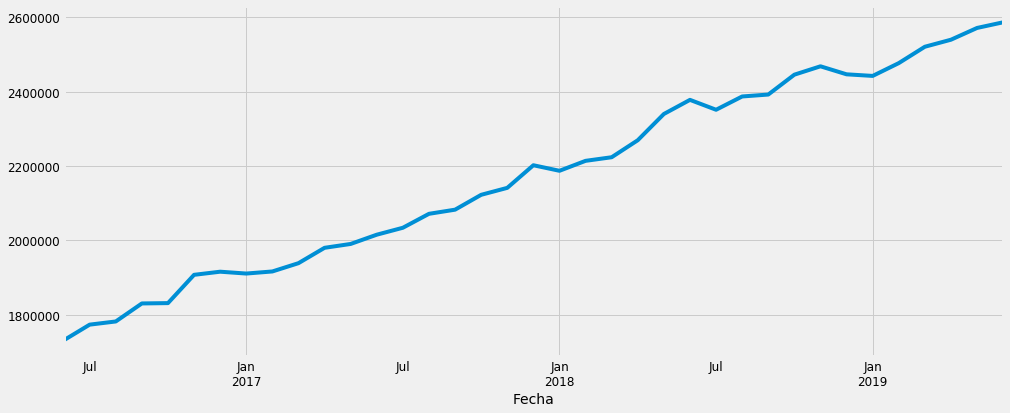

In [36]:
y.plot(figsize=(15, 6))
plt.show()

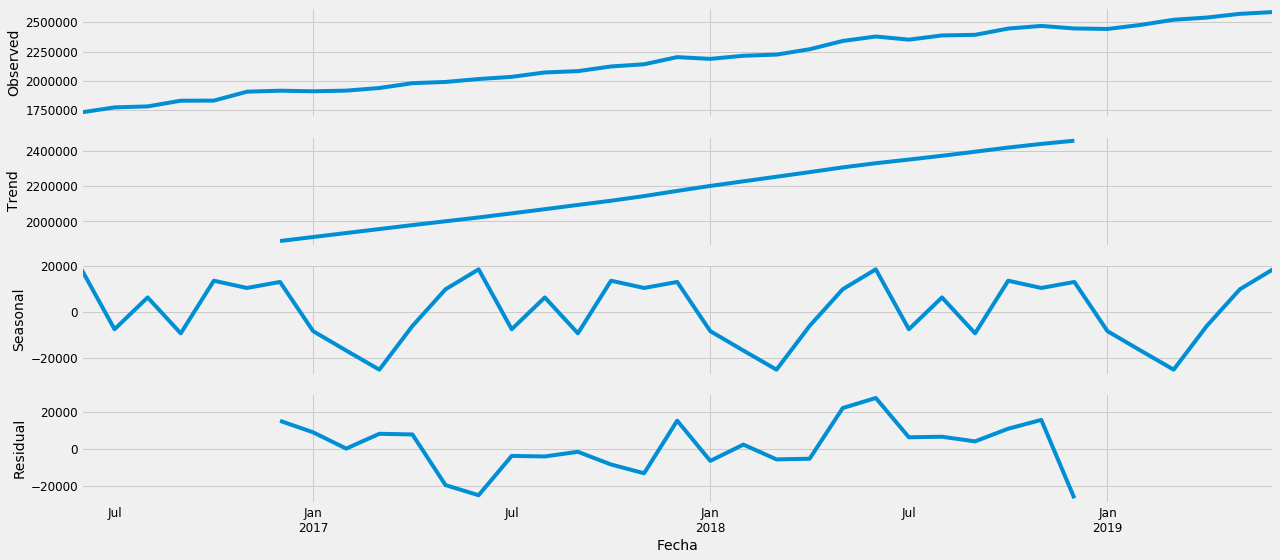

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [39]:
X= macros.drop(['Cartera Vigente'], axis=1)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.9883863896838256


In [41]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [48]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1066      2.954     -0.036      0.971      -5.896       5.682
ma.L1         -0.0481      2.381     -0.020      0.984      -4.714       4.618
ar.S.L12      -0.5810      0.975     -0.596      0.551      -2.492       1.330
sigma2      1.119e+09   2.42e-10   4.63e+18      0.000    1.12e+09    1.12e+09


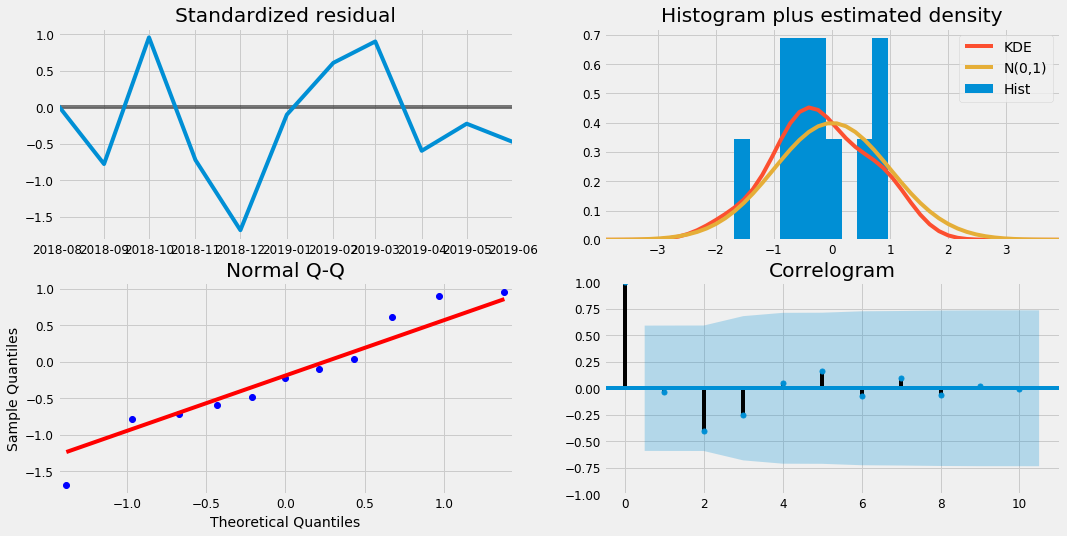

In [49]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [52]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 190560.29


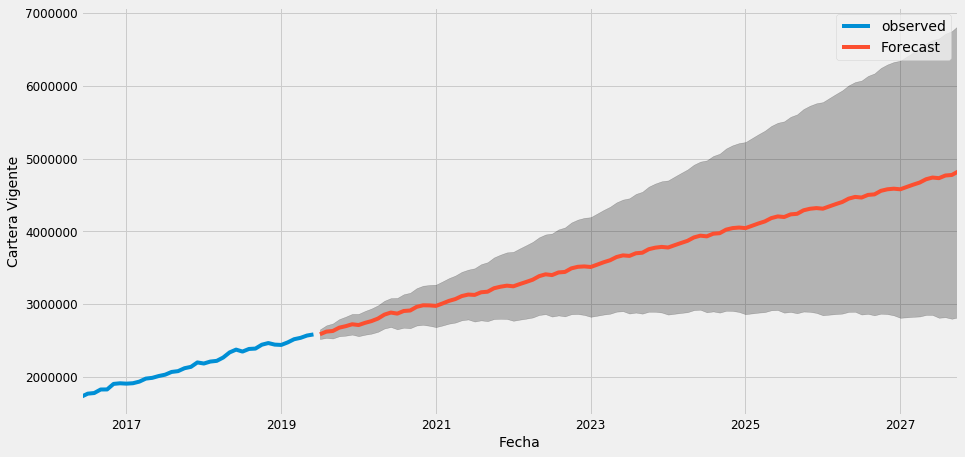

In [57]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cartera Vigente')
plt.legend()
plt.show()

In [60]:
pred_ci.to_csv(r'C:/Users/grace/Documents/Machine Learning/predicciones.csv')

In [61]:
pred_ci

,lower Cartera Vigente,upper Cartera Vigente
2019-07-01,2.523219e+06,2.654364e+06
2019-08-01,2.539417e+06,2.711134e+06
2019-09-01,2.531166e+06,2.736735e+06
2019-10-01,2.562311e+06,2.796786e+06
2019-11-01,2.569742e+06,2.829942e+06
2019-12-01,2.584353e+06,2.867953e+06
2020-01-01,2.563078e+06,2.868289e+06
2020-02-01,2.582964e+06,2.908353e+06
2020-03-01,2.597536e+06,2.941924e+06
2020-04-01,2.623033e+06,2.985425e+06
